<a href="https://colab.research.google.com/github/Rach-fos/FINAL_PROJECT_NYPD-SHOOTINGS/blob/main/NYPD_Shooting_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/christopherhuntley/BUAN6510/blob/master/img/Dolan.png?raw=true" width="180px" align="right">

# **DATA 6505**
# **Final Project: Analyze NYPD Shooting Cases**
_Mee Ho, Madeline Mills, Rachel Foster_


---




## **1. Data Sources (2 Datasets):**




In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

###**DATASET 1: NYPD Shooting Incidents**

In [ ]:
url1 = 'https://raw.githubusercontent.com/Rach-fos/FINAL_PROJECT_NYPD-SHOOTINGS/main/NYPD_Shooting_Incident_Data__Historic_%20(1).csv'

nypd_df = pd.read_csv(url1)

nypd_df

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,228798151,05/27/2021,21:30:00,QUEENS,NaN,105,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1.058925e+06,180924.000000,40.662965,-73.730839,POINT (-73.73083868899994 40.662964620000025)
1,137471050,06/27/2014,17:40:00,BRONX,NaN,40,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1.005028e+06,234516.000000,40.810352,-73.924942,POINT (-73.92494232599995 40.81035186300006)
2,147998800,11/21/2015,03:56:00,QUEENS,NaN,108,0.0,NaN,NaN,True,...,NaN,NaN,25-44,M,WHITE,1.007668e+06,209836.531250,40.742607,-73.915492,POINT (-73.91549174199997 40.74260663300004)
3,146837977,10/09/2015,18:30:00,BRONX,NaN,44,0.0,NaN,NaN,False,...,NaN,NaN,<18,M,WHITE HISPANIC,1.006537e+06,244511.140625,40.837782,-73.919457,POINT (-73.91945661499994 40.83778200300003)
4,58921844,02/19/2009,22:58:00,BRONX,NaN,47,0.0,NaN,NaN,True,...,M,BLACK,45-64,M,BLACK,1.024922e+06,262189.406250,40.886238,-73.852910,POINT (-73.85290950899997 40.88623791800006)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27307,245029823,05/14/2022,03:02:00,BRONX,OUTSIDE,48,0.0,STREET,(null),False,...,(null),(null),18-24,M,BLACK,1.011526e+06,247828.000000,40.846864,-73.901413,POINT (-73.90141321 40.84686352)
27308,239583450,01/22/2022,13:15:00,MANHATTAN,OUTSIDE,30,0.0,STREET,(null),False,...,F,WHITE HISPANIC,25-44,M,WHITE HISPANIC,9.974580e+05,240485.000000,40.826743,-73.952273,POINT (-73.952273 40.826743)
27309,246825728,06/18/2022,03:29:00,MANHATTAN,OUTSIDE,32,0.0,STREET,(null),False,...,M,BLACK,25-44,M,BLACK,1.000999e+06,234464.000000,40.810209,-73.939496,POINT (-73.9394955 40.81020941)
27310,246876579,06/19/2022,20:08:00,BRONX,INSIDE,46,2.0,HOUSING,MULTI DWELL - PUBLIC HOUS,False,...,M,BLACK,25-44,M,WHITE HISPANIC,1.012980e+06,251028.000000,40.855644,-73.896141,POINT (-73.896141 40.855644)


In [ ]:
#description for dataframe
nypd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27312 entries, 0 to 27311
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCIDENT_KEY             27312 non-null  int64  
 1   OCCUR_DATE               27312 non-null  object 
 2   OCCUR_TIME               27312 non-null  object 
 3   BORO                     27312 non-null  object 
 4   LOC_OF_OCCUR_DESC        1716 non-null   object 
 5   PRECINCT                 27312 non-null  int64  
 6   JURISDICTION_CODE        27310 non-null  float64
 7   LOC_CLASSFCTN_DESC       1716 non-null   object 
 8   LOCATION_DESC            12335 non-null  object 
 9   STATISTICAL_MURDER_FLAG  27312 non-null  bool   
 10  PERP_AGE_GROUP           17968 non-null  object 
 11  PERP_SEX                 18002 non-null  object 
 12  PERP_RACE                18002 non-null  object 
 13  VIC_AGE_GROUP            27312 non-null  object 
 14  VIC_SEX               

###**DATASET 2: Story Map Data (Statistics for 2010 & 2020)**

In [ ]:
url2 = 'https://raw.githubusercontent.com/Rach-fos/FINAL_PROJECT_NYPD-SHOOTINGS/main/StoryMap-data.csv'

census_df = pd.read_csv(url2)

census_df = census_df.drop([0, 1])
census_df

,Orig Order,GeoType,Borough,GeoID,Name,NTA Type,Total Population: Pop_10,Total Population: Pop_20,Total Population: Pop Change,Total Population: Natural Change,...,Black non-Hispanic: BNH_10,Black non-Hispanic: BNH_20,Black non-Hispanic: Pop Change,Black non-Hispanic: Natural Change,Black non-Hispanic: Net Migration,Asian non-Hispanic: ANH_10,Asian non-Hispanic: ANH_20,Asian non-Hispanic: Pop Change,Asian non-Hispanic: Natural Change,Asian non-Hispanic: Net Migration
2,1,NYC,New York City,0,NYC (adjusted for citywide total population in...,NaN,"8,242,624","8,804,190","561,566","612,638",...,"1,861,295","1,776,891","-84,404","87,308","-171,712","1,028,119","1,373,502","345,383","148,946","196,437"
3,2,Boro,Manhattan,1,Manhattan,NaN,"1,585,873","1,694,251","108,378","81,949",...,"205,340","199,592","-5,748","-1,153","-4,595","177,624","219,624","42,000","19,511","22,489"
4,3,Boro,Bronx,2,Bronx,NaN,"1,385,108","1,472,654","87,546","114,402",...,"416,695","419,393","2,698","29,364","-26,666","47,335","67,766","20,431","8,012","12,419"
5,4,Boro,Brooklyn,3,Brooklyn,NaN,"2,504,700","2,736,074","231,374","246,479",...,"799,066","729,696","-69,370","39,815","-109,185","260,129","370,776","110,647","49,274","61,373"
6,5,Boro,Queens,4,Queens,NaN,"2,230,722","2,405,464","174,742","152,976",...,"395,881","381,375","-14,506","15,628","-30,134","508,334","656,583","148,249","68,698","79,551"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,264,NTA2020,Staten Island,SI0391,Freshkills Park (South),9,97,95,-2,9,...,0,2,2,1,1,15,19,4,0,4
266,265,NTA2020,Staten Island,SI9561,Fort Wadsworth,6,731,495,-236,120,...,68,40,-28,6,-34,6,15,9,5,4
267,266,NTA2020,Staten Island,SI9591,Hoffman & Swinburne Islands,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
268,267,NTA2020,Staten Island,SI9592,Miller Field,9,31,46,15,-1,...,7,5,-2,-1,-1,0,7,7,0,7


In [ ]:
#description for dataframe
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 2 to 269
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Orig Order                                     268 non-null    object
 1   GeoType                                        268 non-null    object
 2   Borough                                        268 non-null    object
 3   GeoID                                          268 non-null    object
 4   Name                                           268 non-null    object
 5   NTA Type                                       262 non-null    object
 6   Total Population: Pop_10                       268 non-null    object
 7   Total Population: Pop_20                       268 non-null    object
 8   Total Population: Pop Change                   268 non-null    object
 9   Total Population: Natural Change               268 non-null    ob

## **2. Merging Both Datasets:**


**Before merging the data, create a sub dataset to focus on the data we want to compare the census file to**

In [ ]:
#value options in NYPD dataset BORO column
unique_values = nypd_df['BORO'].unique()
print(unique_values)

#total number of incidents
nypd_df['OCCUR_DATE'] = pd.to_datetime(nypd_df['OCCUR_DATE'])

# take the year from OCCUR_DATE and count occurrences of 'Incident Key'
incident_count_by_year = nypd_df.groupby(nypd_df['OCCUR_DATE'].dt.year)['INCIDENT_KEY'].count()

total_incidents_2020 = incident_count_by_year[2020]
total_incidents_2010 = incident_count_by_year[2010]

print(total_incidents_2020)
print(total_incidents_2010)

# creating new df based on the occurrences of each target  value below
target_values = ['MANHATTAN', 'BRONX', 'BROOKLYN','QUEENS','STATEN ISLAND']

filtered_2020_df = nypd_df[(nypd_df['OCCUR_DATE'].dt.year == 2020) & (nypd_df['BORO'].isin(target_values))]
filtered_2010_df = nypd_df[(nypd_df['OCCUR_DATE'].dt.year == 2010) & (nypd_df['BORO'].isin(target_values))]

# Group by 'BORO' and calculate the counts
nypd_boro_count_20_df = filtered_2020_df.groupby('BORO').size() .reset_index(name='2020 Incident Count')
nypd_boro_count_10_df= filtered_2010_df.groupby('BORO').size() .reset_index(name='2010 Incident Count')

merged_boro_count_df = pd.merge(nypd_boro_count_20_df, nypd_boro_count_10_df, on='BORO', how='outer', suffixes=('_2020', '_2010'))

['QUEENS' 'BRONX' 'BROOKLYN' 'MANHATTAN' 'STATEN ISLAND']
1948
1912


In [ ]:
# finding the Percentage of incidents by Borough
merged_boro_count_df['%_2020_incidents'] = merged_boro_count_df['2020 Incident Count'] / total_incidents_2020 *100
merged_boro_count_df['%_2010_incidents'] = merged_boro_count_df['2010 Incident Count'] / total_incidents_2010 * 100

In [ ]:
census_df['BORO'] = census_df['Name'].str.upper()


merged_df = pd.merge(merged_boro_count_df ,census_df , on='BORO', how='inner')


convert_columns = ['Total Population: Pop_10',
       'Total Population: Pop_20', 'Total Population: Pop Change',
       'Total Population: Natural Change', 'Total Population: Net Migration',
       'Hispanic/Latino (of any race): Hsp_10',
       'Hispanic/Latino (of any race): Hsp_20',
       'Hispanic/Latino (of any race): Pop Change',
       'Hispanic/Latino (of any race): Natural Change',
       'Hispanic/Latino (of any race): Net Migration',
       'White non-Hispanic: WNH_10', 'White non-Hispanic: WNH_20',
       'White non-Hispanic: Pop Change', 'White non-Hispanic: Natural Change',
       'White non-Hispanic: Net Migration', 'Black non-Hispanic: BNH_10',
       'Black non-Hispanic: BNH_20', 'Black non-Hispanic: Pop Change',
       'Black non-Hispanic: Natural Change',
       'Black non-Hispanic: Net Migration', 'Asian non-Hispanic: ANH_10',
       'Asian non-Hispanic: ANH_20', 'Asian non-Hispanic: Pop Change',
       'Asian non-Hispanic: Natural Change',
       'Asian non-Hispanic: Net Migration']

merged_df[convert_columns] = merged_df[convert_columns].replace('[^\d.""]', '', regex=True).astype('float64')
merged_df

,BORO,2020 Incident Count,2010 Incident Count,%_2020_incidents,%_2010_incidents,Orig Order,GeoType,Borough,GeoID,Name,...,Black non-Hispanic: BNH_10,Black non-Hispanic: BNH_20,Black non-Hispanic: Pop Change,Black non-Hispanic: Natural Change,Black non-Hispanic: Net Migration,Asian non-Hispanic: ANH_10,Asian non-Hispanic: ANH_20,Asian non-Hispanic: Pop Change,Asian non-Hispanic: Natural Change,Asian non-Hispanic: Net Migration
0,BRONX,504,525,25.872690,27.458159,3,Boro,Bronx,2,Bronx,...,416695.0,419393.0,2698.0,29364.0,26666.0,47335.0,67766.0,20431.0,8012.0,12419.0
1,BROOKLYN,819,805,42.043121,42.102510,4,Boro,Brooklyn,3,Brooklyn,...,799066.0,729696.0,69370.0,39815.0,109185.0,260129.0,370776.0,110647.0,49274.0,61373.0
2,MANHATTAN,272,260,13.963039,13.598326,2,Boro,Manhattan,1,Manhattan,...,205340.0,199592.0,5748.0,1153.0,4595.0,177624.0,219624.0,42000.0,19511.0,22489.0
3,QUEENS,303,288,15.554415,15.062762,5,Boro,Queens,4,Queens,...,395881.0,381375.0,14506.0,15628.0,30134.0,508334.0,656583.0,148249.0,68698.0,79551.0
4,STATEN ISLAND,50,34,2.566735,1.778243,6,Boro,Staten Island,5,Staten Island,...,44313.0,46835.0,2522.0,3824.0,1302.0,34697.0,58753.0,24056.0,3490.0,20566.0


## **3. Temporal Patterns:**


In [ ]:
url1 = 'https://raw.githubusercontent.com/Rach-fos/FINAL_PROJECT_NYPD-SHOOTINGS/main/NYPD_Shooting_Incident_Data__Historic_%20(1).csv'

nypd_df = pd.read_csv(url1)

nypd_df['OCCUR_DATE'] = pd.to_datetime(nypd_df['OCCUR_DATE'] + ' ' + nypd_df['OCCUR_TIME'])

nypd_df = nypd_df.dropna(subset=['OCCUR_DATE'])
nypd_df['YEAR'] = nypd_df['OCCUR_DATE'].dt.year

nypd_df_filtered = nypd_df[(nypd_df['YEAR'] >= 2010) & (nypd_df['YEAR'] <= 2022)]

###**Number of Shooting Incidents Per Year**


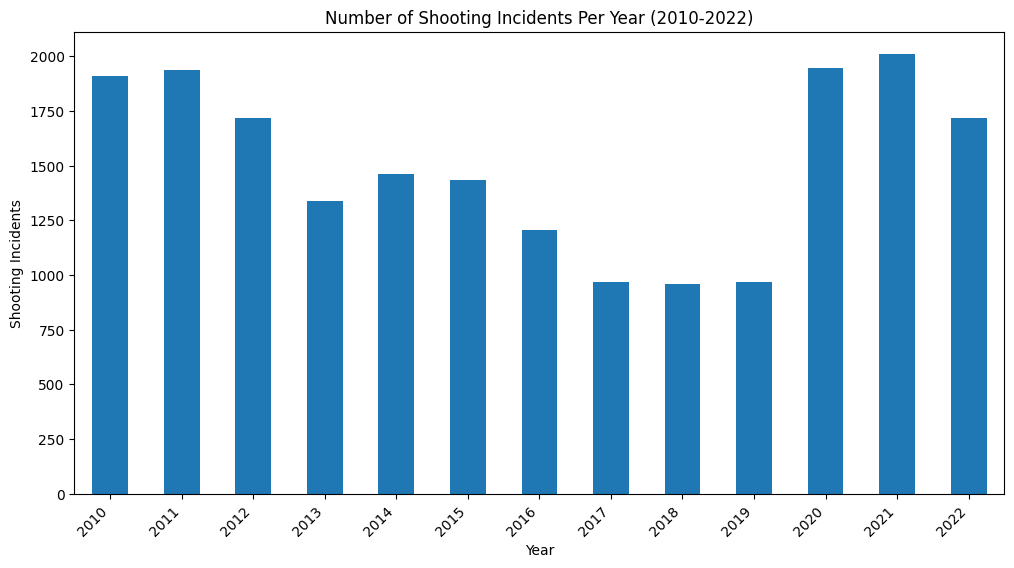

In [ ]:
yearly_counts = nypd_df_filtered.groupby(nypd_df_filtered['OCCUR_DATE'].dt.year)['OCCUR_DATE'].count()

fig, ax = plt.subplots(figsize=(12, 6))
yearly_counts.plot(kind='bar', ax=ax)
ax.set_xticklabels(yearly_counts.index, rotation=45, ha='right')
ax.set_xlabel('Year')
ax.set_ylabel('Shooting Incidents')
ax.set_title('Number of Shooting Incidents Per Year (2010-2022)')
plt.show()

###**Monthly Distribution of Shooting Incidents**

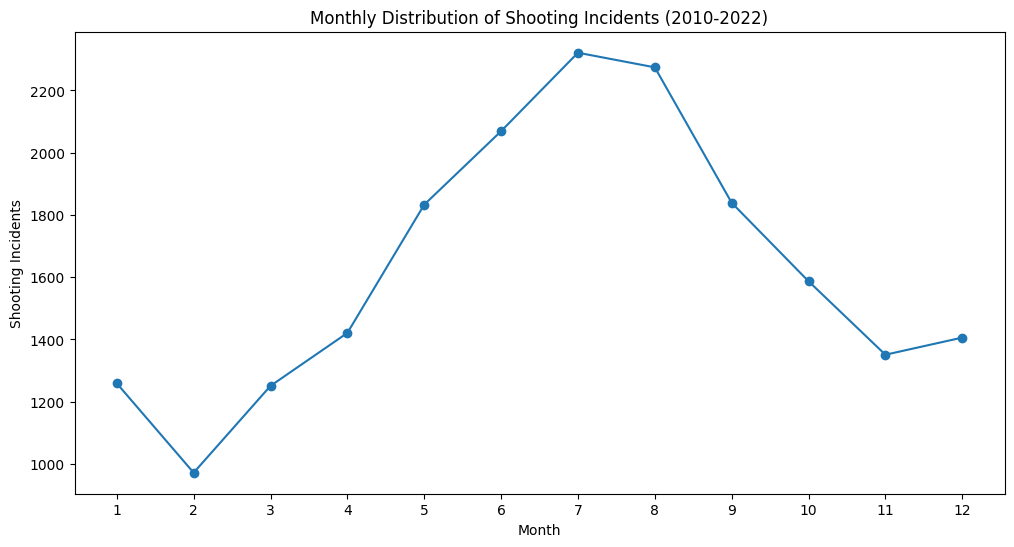

In [ ]:
plt.figure(figsize=(12, 6))
monthly_counts = nypd_df_filtered['OCCUR_DATE'].dt.month.value_counts().sort_index()
plt.plot(monthly_counts.index, monthly_counts.values, marker='o')
plt.xticks(range(1, 13))
plt.xlabel('Month')
plt.ylabel('Shooting Incidents')
plt.title('Monthly Distribution of Shooting Incidents (2010-2022)')
plt.show()

###**Seasonal Distribution of Shooting Incidence**

<ipython-input-82-41e942bc37c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nypd_df_filtered['SEASON'] = (nypd_df_filtered['OCCUR_DATE'].dt.month % 12 + 3) // 3


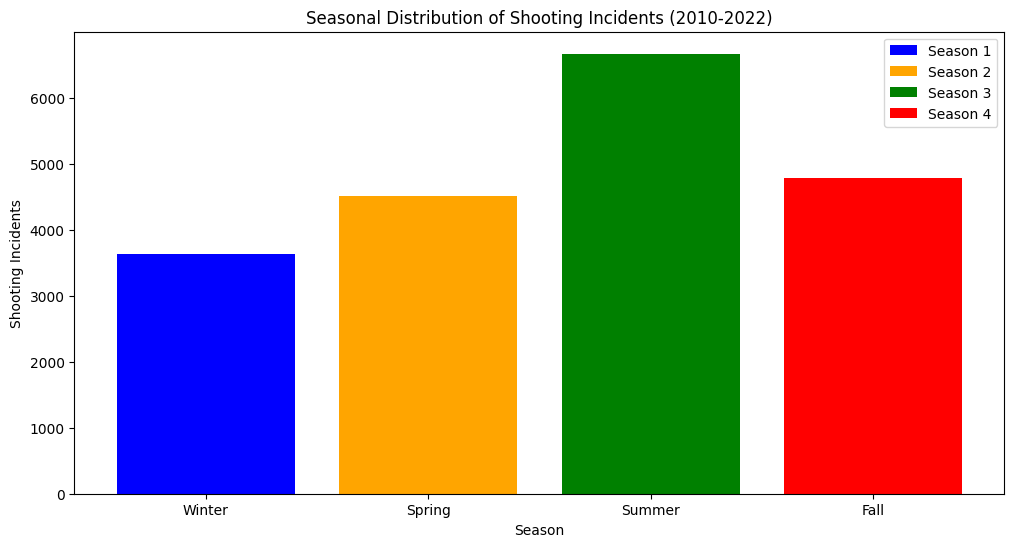

In [ ]:
plt.figure(figsize=(12, 6))
nypd_df_filtered['SEASON'] = (nypd_df_filtered['OCCUR_DATE'].dt.month % 12 + 3) // 3
season_colors = {1: 'blue', 2: 'orange', 3: 'green', 4: 'red'}
seasonal_counts = nypd_df_filtered['SEASON'].value_counts().sort_index()

for season, color in season_colors.items():
    plt.bar(season, seasonal_counts[season], color=color, label=f'Season {season}')

plt.xticks(range(1, 5), ['Winter', 'Spring', 'Summer', 'Fall'])
plt.xlabel('Season')
plt.ylabel('Shooting Incidents')
plt.title('Seasonal Distribution of Shooting Incidents (2010-2022)')
plt.legend()
plt.show()

Research indicates a correlation between rising temperatures and a surge in gun violence within the United States. Elevated temperatures can escalate blood pressure, heighten stress levels, and foster more frequent interpersonal interactions, often spurred by increased outdoor activities. Such circumstances collectively amplify the risk of firearm-related incidents, especially during the hotter summer seasons. For instance, an analysis examining the influence of daily temperatures on 116,000 shootings nationwide found that 7,973 of these incidents could be directly linked to temperatures exceeding the average. As climate change threatens to raise daily temperatures even more, the researchers emphasize that their findings underscore the urgency for continuous policies and programs.

###**Shooting Incidence by Time of Day**

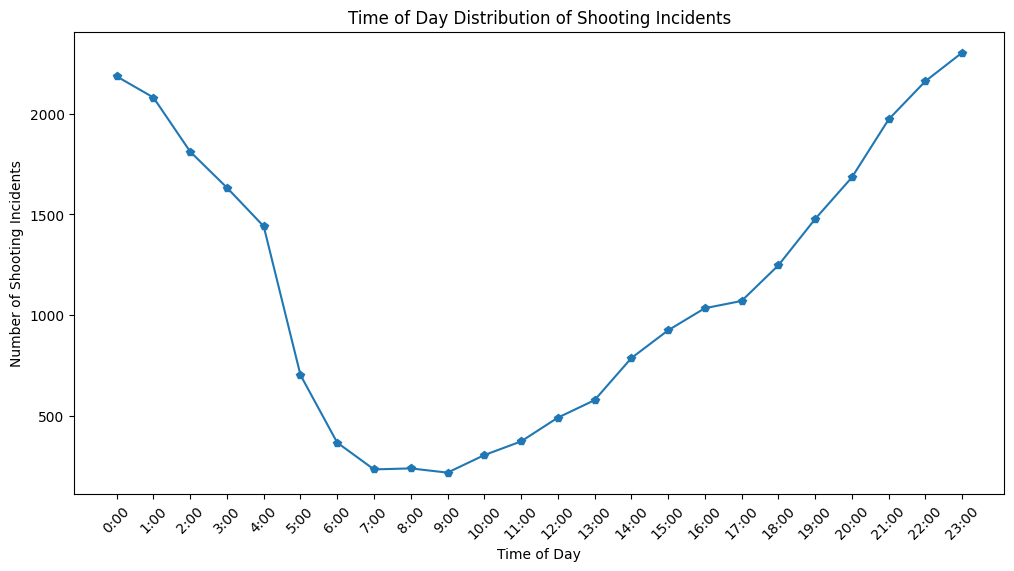

In [ ]:
nypd_df['HOUR_OF_DAY'] = nypd_df['OCCUR_DATE'].dt.hour
hourly_counts = nypd_df['HOUR_OF_DAY'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(hourly_counts.index, hourly_counts.values, marker='p')
ax.set_xticks(range(24))
ax.set_xticklabels([str(i) + ":00" for i in range(24)], rotation=45)
ax.set_xlabel('Time of Day')
ax.set_ylabel('Number of Shooting Incidents')
ax.set_title('Time of Day Distribution of Shooting Incidents')
plt.show()

###**Seasonal Variation in Incidence from 2010-2022**

<ipython-input-84-73efb7b00ea6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nypd_df_filtered['SEASON'] = (nypd_df_filtered['OCCUR_DATE'].dt.month % 12 + 3) // 3


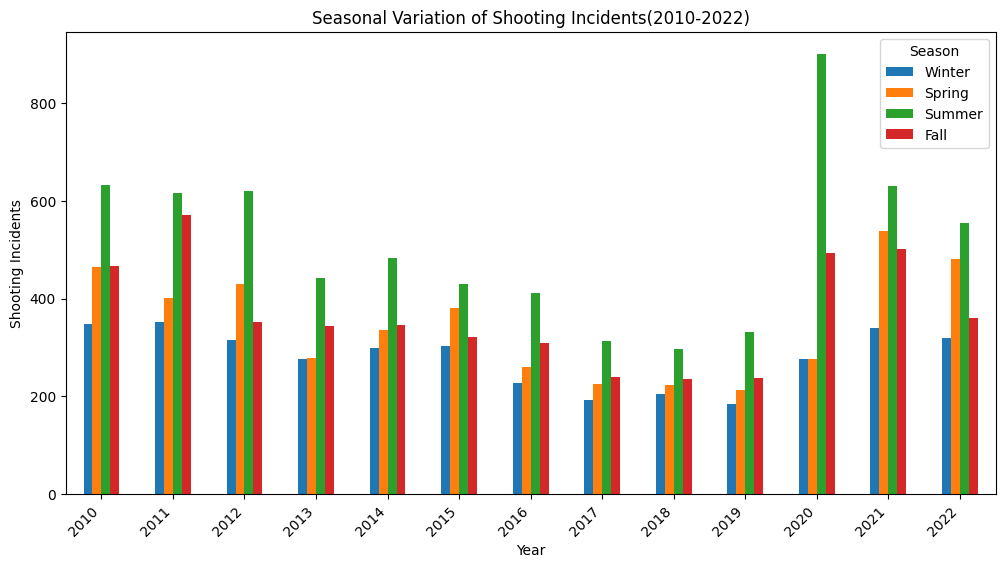

In [ ]:
nypd_df_filtered['SEASON'] = (nypd_df_filtered['OCCUR_DATE'].dt.month % 12 + 3) // 3
seasonal_counts = nypd_df_filtered.groupby(['YEAR', 'SEASON']).size().unstack()

fig, ax = plt.subplots(figsize=(12, 6))
seasonal_counts.plot(kind='bar', ax=ax)
ax.set_xticklabels(seasonal_counts.index, rotation=45, ha='right')
ax.set_xlabel('Year')
ax.set_ylabel('Shooting Incidents')
ax.set_title('Seasonal Variation of Shooting Incidents(2010-2022)')
plt.legend(title='Season', labels=['Winter', 'Spring', 'Summer', 'Fall'])
plt.show()

###**Statistical Analysis of 2020 Incidence vs Other Years**





In [ ]:
incidence_2020 = nypd_df_filtered[nypd_df_filtered['YEAR'] == 2020]['INCIDENT_KEY'].count()
other_incidence = nypd_df_filtered[(nypd_df_filtered['YEAR'] >= 2010) & (nypd_df_filtered['YEAR'] < 2020)]['INCIDENT_KEY'].count()
t_stat, p_value = ttest_ind(incidence_2020, other_incidence, nan_policy='omit')
if p_value < 0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

Fail to reject null hypothesis


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:7030: RuntimeWarning: invalid value encountered in double_scalars
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


Extensive research has been conducted to investigate the surge in violence in the United States in relation to the 2020 Covid-19 Pandemic. Studies reveal that gun violence and gun related homicides reached unprecedented levels during this period. Multiple investigations have documented the profound impact of the pandemic on gun violence, with both homicides and unintentional shootings soaring to record highs.

However, our statistical test indicates that there was no statistically significant difference between the number of shootings in New York City in 2020 and the incidence from 2010 to 2019. Despite the well documented increase in gun related incidents during the pandemic, the results suggest that from a statistical standpoint, the levels of shootings in New York City in 2020 were not significantly different from the preceding decade.

## **4. Demographic Factors:**


###**Population Comparison by Borough against Volume of Incidents**

In [ ]:
#calculating percentage of population for 2010 and 2020

total_2010_population = merged_df['Total Population: Pop_10'].sum()
merged_df['%_2010_census_pop']= merged_df['Total Population: Pop_10'] / total_2010_population * 100

total_2020_population = merged_df['Total Population: Pop_20'].sum()
merged_df['%_2020_census_pop']= merged_df['Total Population: Pop_20'] / total_2020_population * 100

merged_df[['BORO','%_2010_incidents','%_2010_census_pop','%_2020_incidents','%_2020_census_pop']]


,BORO,%_2010_incidents,%_2010_census_pop,%_2020_incidents,%_2020_census_pop
0,BRONX,27.458159,16.942941,25.872690,16.726740
1,BROOKLYN,42.102510,30.638034,42.043121,31.076953
2,MANHATTAN,13.598326,19.398743,13.963039,19.243690
3,QUEENS,15.062762,27.286675,15.554415,27.321809
4,STATEN ISLAND,1.778243,5.733607,2.566735,5.630808


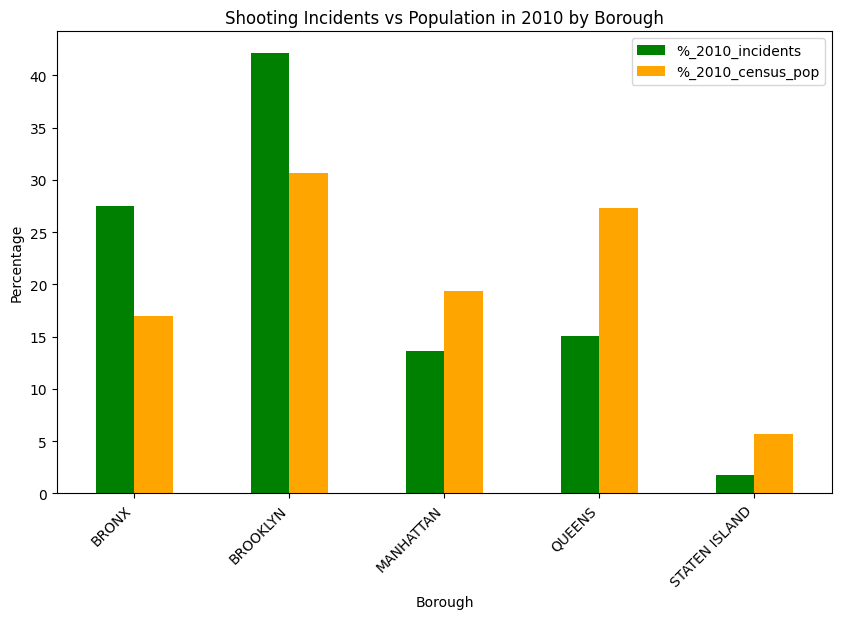

In [ ]:

plot_data = merged_df[['BORO', '%_2010_incidents', '%_2010_census_pop']]
plot_data.set_index('BORO', inplace=True)

plot_data.plot(kind='bar', figsize=(10, 6), color = ['green','orange'])
plt.title('Shooting Incidents vs Population in 2010 by Borough')
plt.xlabel('Borough')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.show()

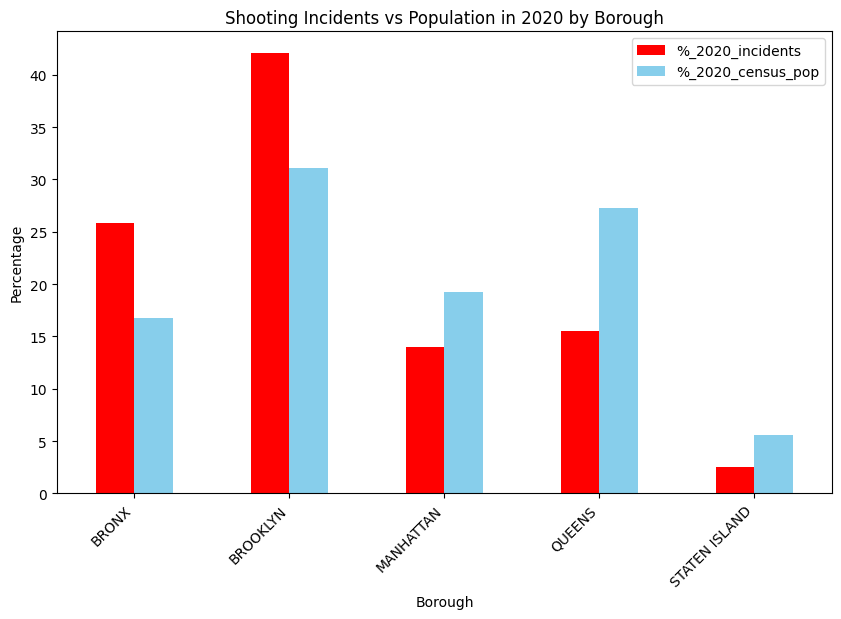

In [ ]:

plot_data = merged_df[['BORO', '%_2020_incidents', '%_2020_census_pop']]
plot_data.set_index('BORO', inplace=True)

plot_data.plot(kind='bar', figsize=(10, 6), color = ['red','skyblue'])
plt.title('Shooting Incidents vs Population in 2020 by Borough')
plt.xlabel('Borough')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.show()


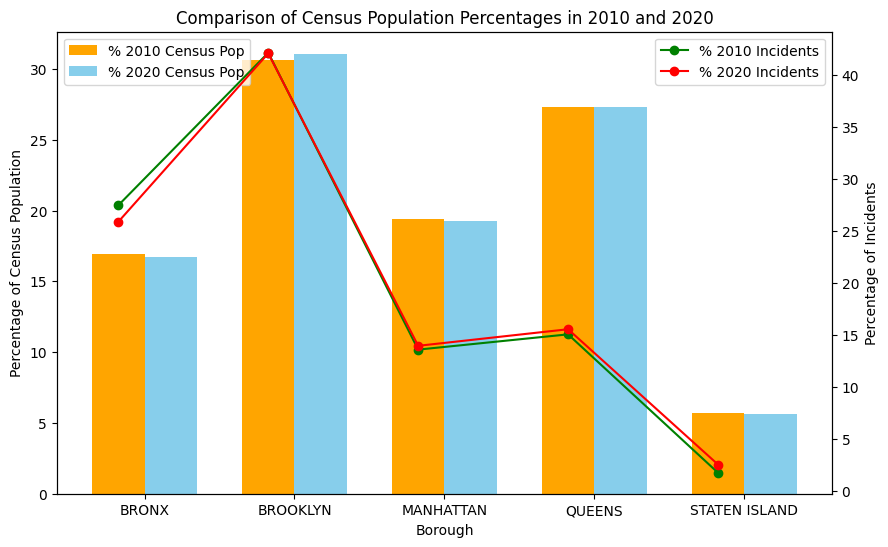

In [ ]:

plot_data = merged_df[['BORO', '%_2010_incidents', '%_2020_incidents', '%_2010_census_pop', '%_2020_census_pop']]
plot_data.set_index('BORO', inplace=True)
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for 2010 and 2020 populations
bar_width = 0.35
bar_positions_2010 = np.arange(len(plot_data.index))
bar_positions_2020 = bar_positions_2010 + bar_width

ax1.bar(bar_positions_2010, plot_data['%_2010_census_pop'],\
        width=bar_width, label='% 2010 Census Pop', color='orange')
ax1.bar(bar_positions_2020, plot_data['%_2020_census_pop'], \
        width=bar_width, label='% 2020 Census Pop', color='skyblue')

ax1.set_xlabel('Borough')
ax1.set_ylabel('Percentage of Census Population')
ax1.set_title('Comparison of Census Population Percentages in 2010 and 2020')

ax2 = ax1.twinx()

# Line plot for 2010 and 2020 incidents
line_positions = np.arange(len(plot_data.index))
ax2.plot(line_positions, plot_data['%_2010_incidents'], \
         label='% 2010 Incidents', color='green', marker='o')
ax2.plot(line_positions, plot_data['%_2020_incidents'], \
         label='% 2020 Incidents', color='red', marker='o')

ax2.set_ylabel('Percentage of Incidents')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.set_xticks(line_positions + bar_width / 2)
ax1.set_xticklabels(plot_data.index)
plt.show()


###**Victim's Race by Incident compared to the Population**

In [ ]:

# Create 'Race_Bucket' column based on specified buckets
nypd_df['Race_Bucket'] = np.where(
    nypd_df['VIC_RACE'].isin(['WHITE HISPANIC', 'BLACK HISPANIC']), 'HISPANIC',
    np.where(nypd_df['VIC_RACE'] == 'ASIAN / PACIFIC ISLANDER', 'ASIAN',
             np.where(nypd_df['VIC_RACE'].isin(['UNKNOWN', 'AMERICAN INDIAN/ALASKAN NATIVE']),
                      'OTHER/UNKNOWN', nypd_df['VIC_RACE'])
             ))

print(nypd_df['Race_Bucket'].unique())

race_values = ['BLACK', 'WHITE', 'HISPANIC', 'ASIAN', 'OTHER/UNKNOWN']

# Filter the df to include only data from the year 2020 and specific race values
filtered_df = nypd_df[(nypd_df['OCCUR_DATE'].dt.year == 2020) & \
 (nypd_df['Race_Bucket'].isin(race_values))]

# Group by 'Race_Bucket' and calculate the count
nypd_race_count_df = filtered_df.groupby('Race_Bucket').size().reset_index(name='race_count')

nypd_race_count_df['%_Vic_Race_20'] =nypd_race_count_df['race_count'] \
  / nypd_race_count_df['race_count'].sum() * 100
nypd_race_count_df




['BLACK' 'WHITE' 'HISPANIC' 'ASIAN' 'OTHER/UNKNOWN']


,Race_Bucket,race_count,%_Vic_Race_20
0,ASIAN,38,1.950719
1,BLACK,1380,70.841889
2,HISPANIC,491,25.205339
3,WHITE,39,2.002053


In [ ]:
# Calculate the total population for each race in 2020
black_pop_20 = merged_df['Black non-Hispanic: BNH_20'].sum().astype(float)
asian_pop_20 = merged_df['Asian non-Hispanic: ANH_20'].sum().astype(float)
hispanic_pop_20 = merged_df['Hispanic/Latino (of any race): Hsp_20'].sum().astype(float)
white_pop_20 = merged_df['White non-Hispanic: WNH_20'].sum().astype(float)

# maps totals  and its corresponding population for the year 2020
race_mapping = {
    'ASIAN': asian_pop_20,
    'BLACK': black_pop_20,
    'HISPANIC': hispanic_pop_20,
    'WHITE': white_pop_20}

# Map the values from merged_df to nypd_race_count_df based on 'Race_Bucket' column
nypd_race_count_df['total_pop_sum'] = nypd_race_count_df['Race_Bucket'].map(race_mapping)
nypd_race_count_df['total_pop_sum'] = nypd_race_count_df['total_pop_sum'].replace\
 ('[^\d.]', '', regex=True).astype('float64')

# Calculate the percentage of each race in the total population
nypd_race_count_df['%_Race_2020'] = (nypd_race_count_df['total_pop_sum'] / total_2020_population) * 100
nypd_race_count_df

,Race_Bucket,race_count,%_Vic_Race_20,total_pop_sum,%_Race_2020
0,ASIAN,38,1.950719,1373502.0,15.600549
1,BLACK,1380,70.841889,1776891.0,20.182334
2,HISPANIC,491,25.205339,2490350.0,28.285964
3,WHITE,39,2.002053,2719856.0,30.892745


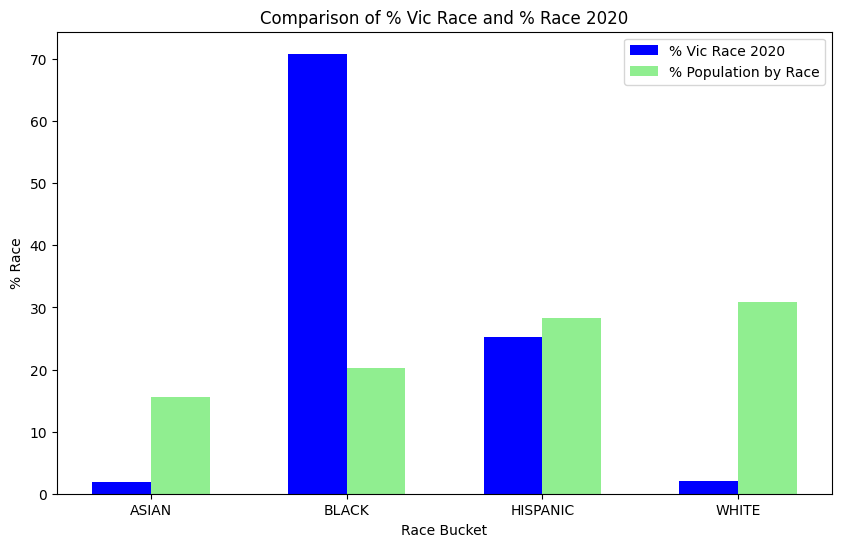

In [ ]:
nypd_race_count_df.set_index('Race_Bucket', inplace=True)
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.30
bar_positions_vic_race = np.arange(len(nypd_race_count_df))
bar_positions_population_race = bar_positions_vic_race + bar_width

# Vertical bar charts for % Vic Race 2020 and % pop Race
ax.bar(bar_positions_vic_race, nypd_race_count_df['%_Vic_Race_20'],\
       width=bar_width, label='% Vic Race 2020', color='blue')
ax.bar(bar_positions_population_race, nypd_race_count_df['%_Race_2020'], \
       width=bar_width, label='% Population by Race', color='lightgreen')

ax.set_xlabel('Race Bucket')
ax.set_ylabel('% Race')
plt.title('Comparison of % Vic Race and % Race 2020')
ax.legend(loc='upper right')

ax.set_xticks(bar_positions_vic_race + bar_width / 2)
ax.set_xticklabels(nypd_race_count_df.index)

plt.show()


###**Victim's Gender by Incident 2010 - 2022**


---



In [ ]:
nypd_df['VIC_SEX'].unique() #testing what the unique vales are for Vic_sex

array(['M', 'F', 'U'], dtype=object)

In [ ]:
#recording the total number of incidents
nypd_df['VIC_SEX'] = pd.to_datetime(nypd_df['OCCUR_DATE'])

# create new df based on the occurrences of each Sex value
target_values = ['M', 'F', 'U']

filtered_sex_2020_df = nypd_df[(nypd_df['OCCUR_DATE'].dt.year == 2020) & \
 (nypd_df['VIC_SEX'].isin(target_values))]
nypd_sex_count_20_df = filtered_2020_df.groupby('VIC_SEX').size() .reset_index(name='2020 Incident Count')

nypd_sex_count_20_df


,VIC_SEX,2020 Incident Count
0,F,201
1,M,1747


In [ ]:
nypd_df_filtered['VIC_SEX'].unique()


array(['M', 'F', 'U'], dtype=object)

In [ ]:
nypd_df_filtered_sex = nypd_df_filtered[nypd_df_filtered['VIC_SEX'] != 'U']
nypd_df_filtered_sex['VIC_SEX'].unique()
yearly_counts_m = nypd_df_filtered_sex[nypd_df_filtered_sex['VIC_SEX'] == 'M'].groupby\
 (nypd_df_filtered_sex['OCCUR_DATE'].dt.year)['VIC_SEX'].value_counts()
yearly_counts_f =  nypd_df_filtered_sex[nypd_df_filtered_sex['VIC_SEX'] == 'F'].groupby\
 (nypd_df_filtered_sex['OCCUR_DATE'].dt.year)['VIC_SEX'].value_counts()


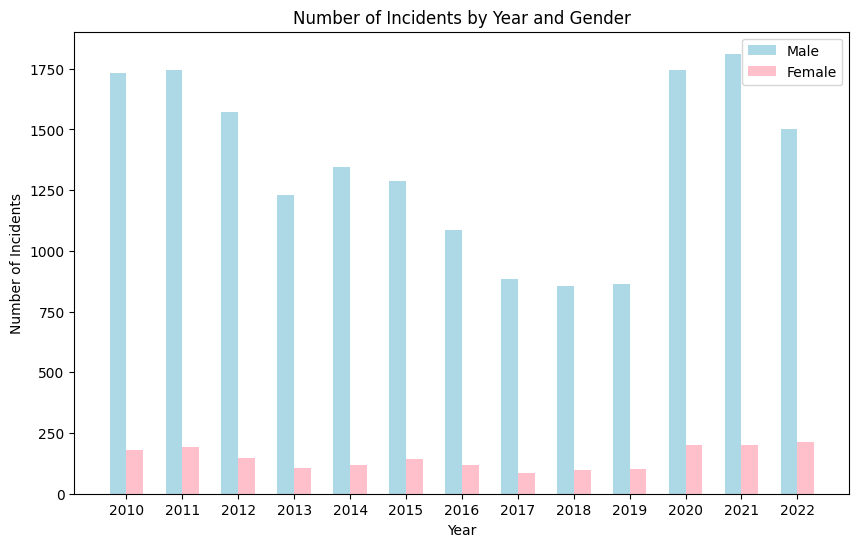

In [ ]:

years = yearly_counts_m.index.get_level_values(0).unique()  # Extract unique years from the index
fig, ax = plt.subplots(figsize=(10, 6))

bar_positions_m = years - bar_width / 2
bar_positions_f = years + bar_width / 2

# data for double bar graph
ax.bar(bar_positions_m, yearly_counts_m.values, width=bar_width, label='Male', color='lightblue')
ax.bar(bar_positions_f, yearly_counts_f.values, width=bar_width, label='Female', color='pink')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Incidents')
plt.title('Number of Incidents by Year and Gender')
ax.legend()
ax.set_xticks(years)
ax.set_xticklabels(years)

plt.show()


## **5. Spatial Analysis:**


###**Pivot table showing shootings incidents throughout the years (2010-2022) divided by boroughs**

In [ ]:
nypd_df = nypd_df[['BORO','OCCUR_DATE']].dropna()
nypd_df['OCCUR_YEAR'] = pd.to_datetime(nypd_df['OCCUR_DATE']).dt.year
cluster_data = nypd_df[['BORO', 'OCCUR_YEAR']]

# Pivot the table for better visualization
cluster_data_pivot = cluster_data.pivot_table(index='OCCUR_YEAR', columns='BORO', aggfunc=len, fill_value=0)
cluster_data_pivot_2010_2022 = cluster_data_pivot.loc[2010:2022]
cluster_data_pivot_2010_2022

BORO,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
OCCUR_YEAR,,,,,
2010,525,805,260,288,34
2011,571,839,215,264,50
2012,531,651,196,290,49
2013,371,593,138,185,52
2014,446,614,143,218,43
2015,409,583,187,205,50
2016,308,498,167,191,44
2017,306,357,117,144,46
2018,313,365,105,150,25


###**Graph Heatmap by boroughs from 2010-2022**

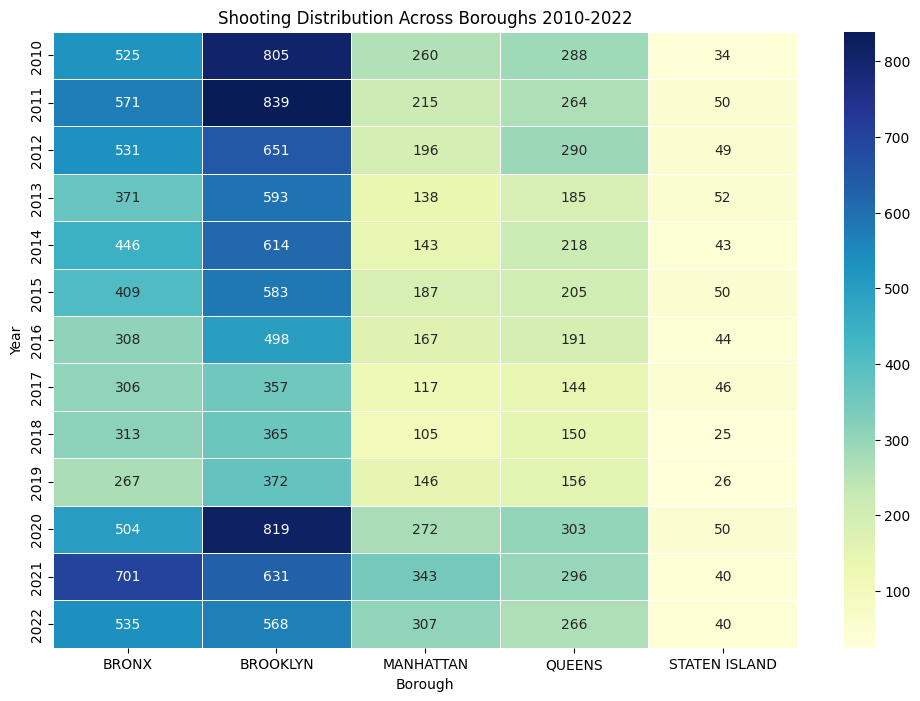

In [ ]:
plt.figure(figsize=(12, 8))

# Draw the heatmap using seaborn
sns.heatmap(cluster_data_pivot_2010_2022, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)

plt.title('Shooting Distribution Across Boroughs 2010-2022')
plt.xlabel('Borough')
plt.ylabel('Year')

plt.show()

###**Cluster Map of shooting incidents in NYC**

In [ ]:
shooting_incident_data = nypd_df[['Latitude','Longitude']].dropna()
shooting_incident_data.info()
shooting_incident_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27302 entries, 0 to 27311
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   27302 non-null  float64
 1   Longitude  27302 non-null  float64
dtypes: float64(2)
memory usage: 639.9 KB


,Latitude,Longitude
0,40.662965,-73.730839
1,40.810352,-73.924942
2,40.742607,-73.915492
3,40.837782,-73.919457
4,40.886238,-73.852910


In [ ]:
import folium
from folium import plugins
from folium.plugins import HeatMap, HeatMapWithTime
from datetime import datetime, timedelta

NYC_lat = 40.730610
NYC_lon = -73.935242

map = folium.Map(location=[NYC_lat, NYC_lon], zoom_start=10)
# folium.TileLayer('cartodbpositron').add_to(map)

coords = [(x, y) for x, y in zip(shooting_incident_data['Latitude'], shooting_incident_data['Longitude'])]

for (x,y) in coords:
    folium.Circle(
        radius=1,
        location=[x, y],
        color="red",
    ).add_to(map)

map #cluster map

<img src="https://github.com/Rach-fos/FINAL_PROJECT_NYPD-SHOOTINGS/blob/main/Cluster%20Map%20.png?raw=true" width="1000px" align="center">

###**Heat Map by Time of Incidents**

In [ ]:
url1 = 'https://raw.githubusercontent.com/Rach-fos/FINAL_PROJECT_NYPD-SHOOTINGS/main/NYPD_Shooting_Incident_Data__Historic_%20(1).csv'

nypd_df = pd.read_csv(url1)

In [ ]:
map = folium.Map(location=[NYC_lat, NYC_lon], zoom_start=10)

nypd_df['OCCUR_DATE'] = pd.to_datetime(nypd_df.OCCUR_DATE)

In [ ]:
frames = [nypd_df['OCCUR_DATE']]
time = pd.concat(frames)
time = pd.Series(time, name = 'dates')
cols = ['Latitude', 'Longitude']
frames2 = [shooting_incident_data[cols]]
location = pd.concat(frames2)
location.head()

In [ ]:
heatmaptime_df = pd.concat([time, location], axis=1, join='inner')
heatmaptime_df['dates'] = pd.to_datetime(heatmaptime_df['dates'])

# Filter rows for the years 2010-2022
heatmap_time_df = heatmaptime_df[(heatmaptime_df['dates'].dt.year >= 2010) & (heatmaptime_df['dates'].dt.year <= 2022)]

heatmap_time_df.head()

In [ ]:
time_index = list(heatmap_time_df['dates'].sort_values().astype('str').unique())
heatmap_time_df['dates'] = heatmap_time_df['dates'].sort_values(ascending=True)
data = []
for _, d in heatmap_time_df.groupby('dates'):
    data.append([[row['Latitude'], row['Longitude']] for _, row in d.iterrows()])
data

hmt = folium.Map(location=[NYC_lat, NYC_lon],
               tiles='cartodbpositron',#'cartodbpositron', stamentoner
               zoom_start=9,
               control_scale=True)

HeatMapWithTime(data,
                index=time_index,
                auto_play=True,
                use_local_extrema=True
               ).add_to(hmt)

hmt

<img src="https://github.com/Rach-fos/FINAL_PROJECT_NYPD-SHOOTINGS/blob/main/Heat%20Map%20by%20Time%202010-2022.gif?raw=true" width="1000px" align="center">

## **6. Analysis Summary:**

**Temporal Analysis:**
We investigated shooting incidents by year, by month, by season, time of day and a deep dive into 2020. We found that based on the seasonal analysis, there were higher volume of shooting incidents in the summer months and this ties to research that shows a coorelation between weather temperature and firearm related incidents. For 2020, while there was extensive research that made ties between the COVID-19 pandemic and increasing gun violence, our data did not show a statistically significant difference in the shooting incident leading up to 2020 and 2020 itself.


---
**Demographic Analysis:**
For the demographic analysis, we focused on three main factors; the population size by borough, the race breakdown by borough and the gender of the victims over time. For the population size compared to the percentage of incidents that occured in the borough, we found that the two boroughs that had a higher ratio of shooting incidents compared to their population size was Brooklyn and the Bronx for both 2010 and 2020. When we looked at the population by race compared to the number of incidents in 2020, we found that the majority of shooting victims were Black. Lastly, we found that it was a consistent trend to see a higher number of male victims than female victims in all years between 2010 - 2022.


---

**Spacial Analysis:**
Last but not least, we looked at shooting incidents by location, specifically by borough over time. We looked at the 5 main Boroughs of NYC: Brooklyn, Bronx, Manhattan, Queens, and Staten Island. We are able to create a pivot table summarizing the volume of shooting incidents for each borough. Bronx and Brooklyn are the top two with the highest number of shooting cases throughout the years. Meanwhile, Staten Island has the lowest with about 1-2% compared to the total number of cases in other boroughs. For better visualization, we are able to create a heatmap, a cluster map and a heatmap over time illustrating hotspots of incidents in NYC. The maps are aligned with our temporal and demographic analysis and indicate the locations with the highest rates of shooting incidents.
